In [1]:
import rasterio 
import matplotlib.pyplot as plt
from rasterio.plot import show_hist, show
from matplotlib import pyplot
import numpy
import os
import sys
import glob

In [2]:
# resampling
resample_list = ['nearest','average','bilinear','gauss','cubic','cubicspline','average_magphase','mode']
source = "C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif"
dec_factor = '32'
for cur in resample_list:
    print("gdaladdo -r "+ cur +" -ro " + source + " --config COMPRESS_OVERVIEW LZW " + dec_factor)
    os.system("gdaladdo -r "+ cur +" -ro " + source + " --config COMPRESS_OVERVIEW LZW " + dec_factor)
    os.rename(r'C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif.ovr',r'C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/{}_{}.tif'.format(cur,dec_factor))

gdaladdo -r nearest -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r average -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r bilinear -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r gauss -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r cubic -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r cubicspline -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r average_magphase -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/module_03/test/dem-source22.tif --config COMPRESS_OVERVIEW LZW 32
gdaladdo -r mode -ro C:/

C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=dri

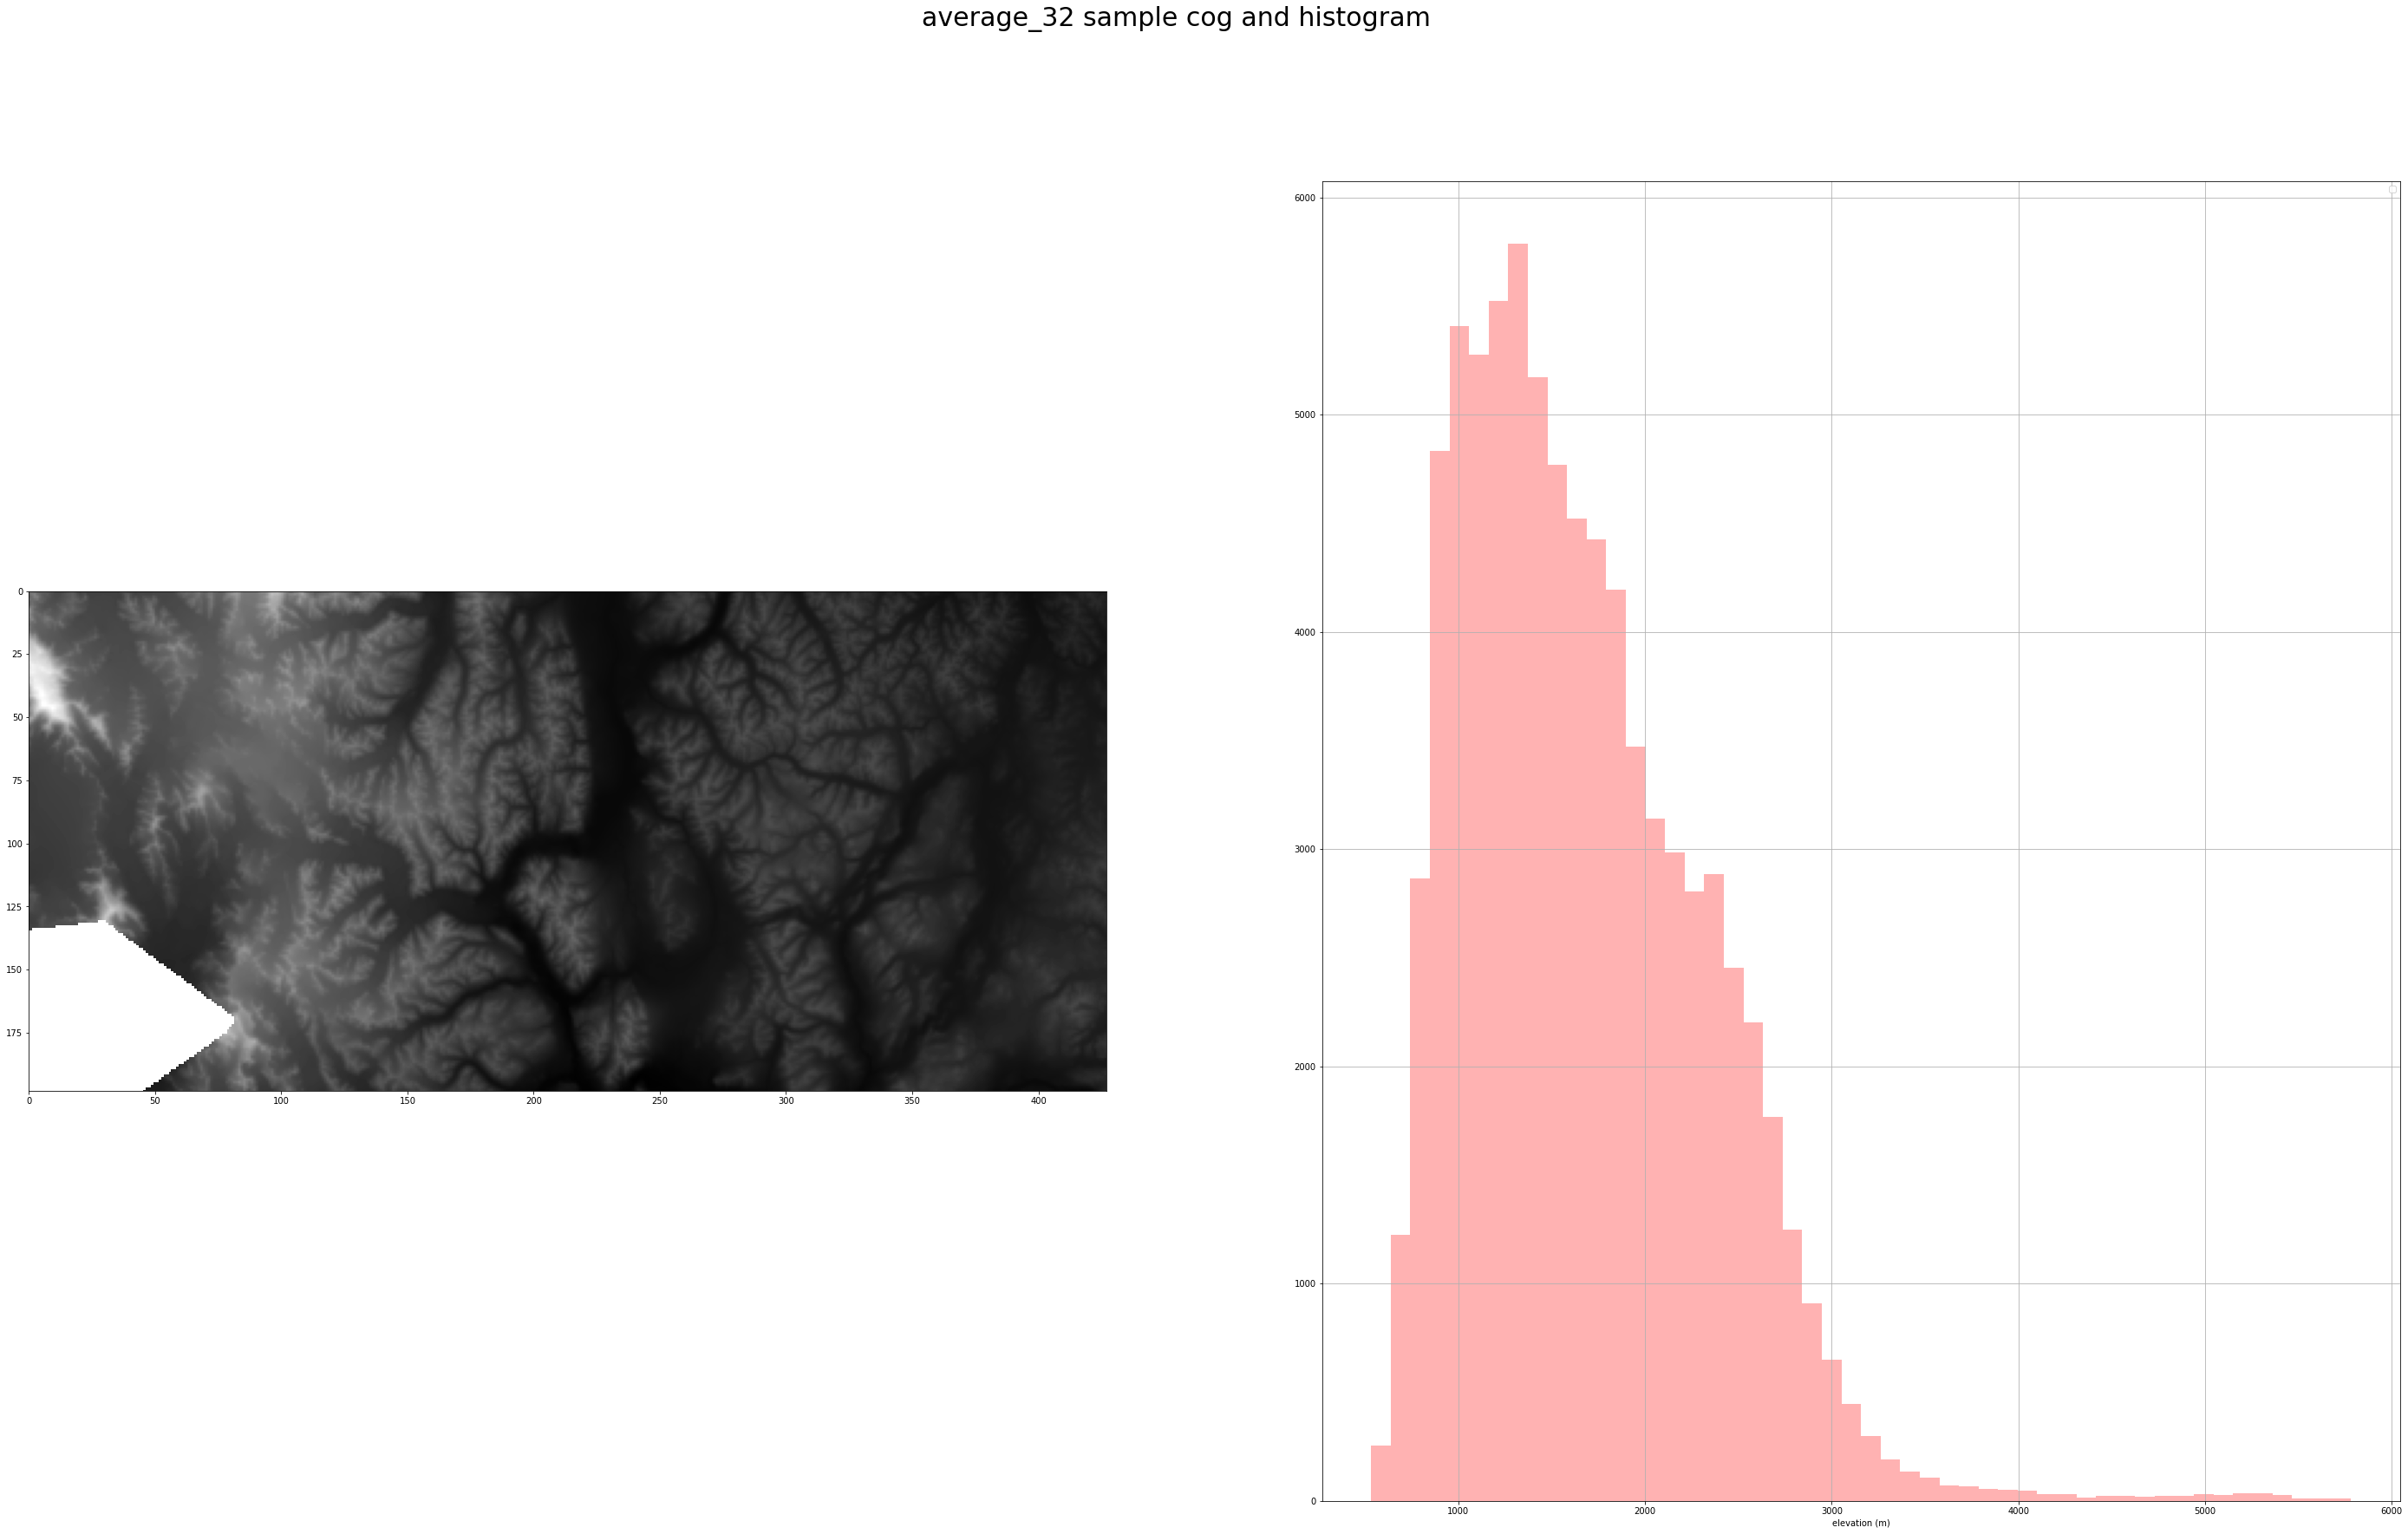

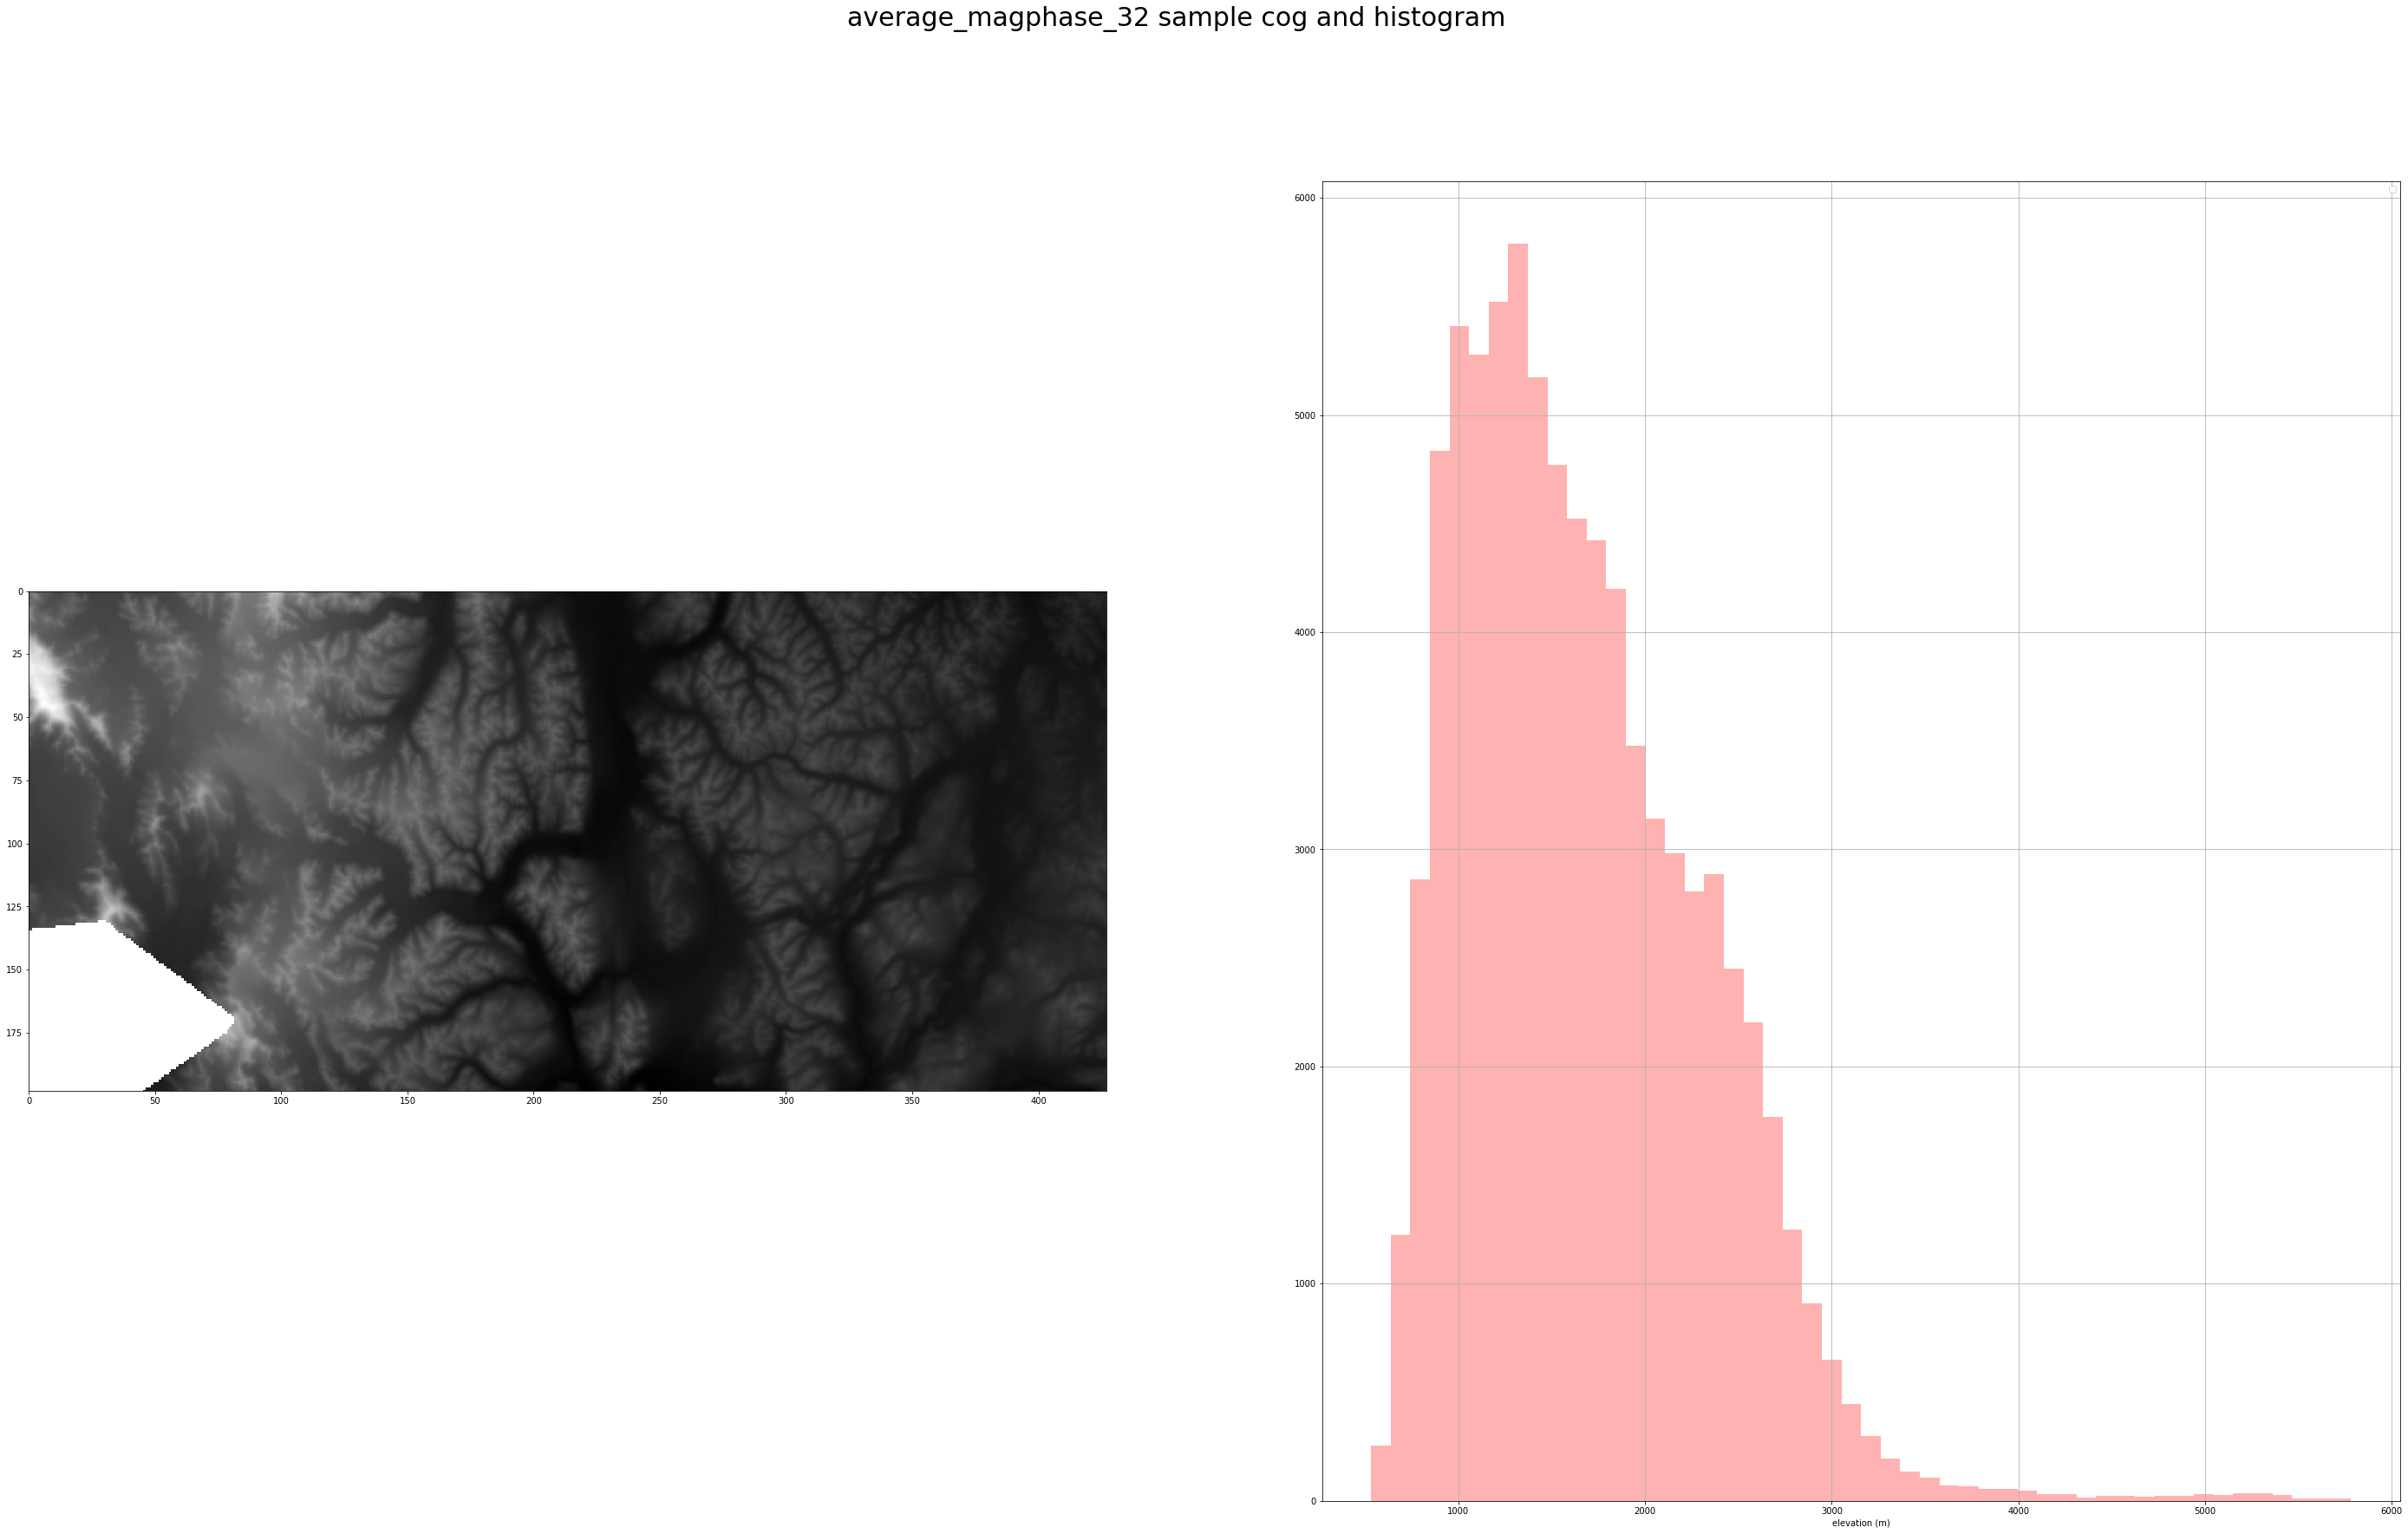

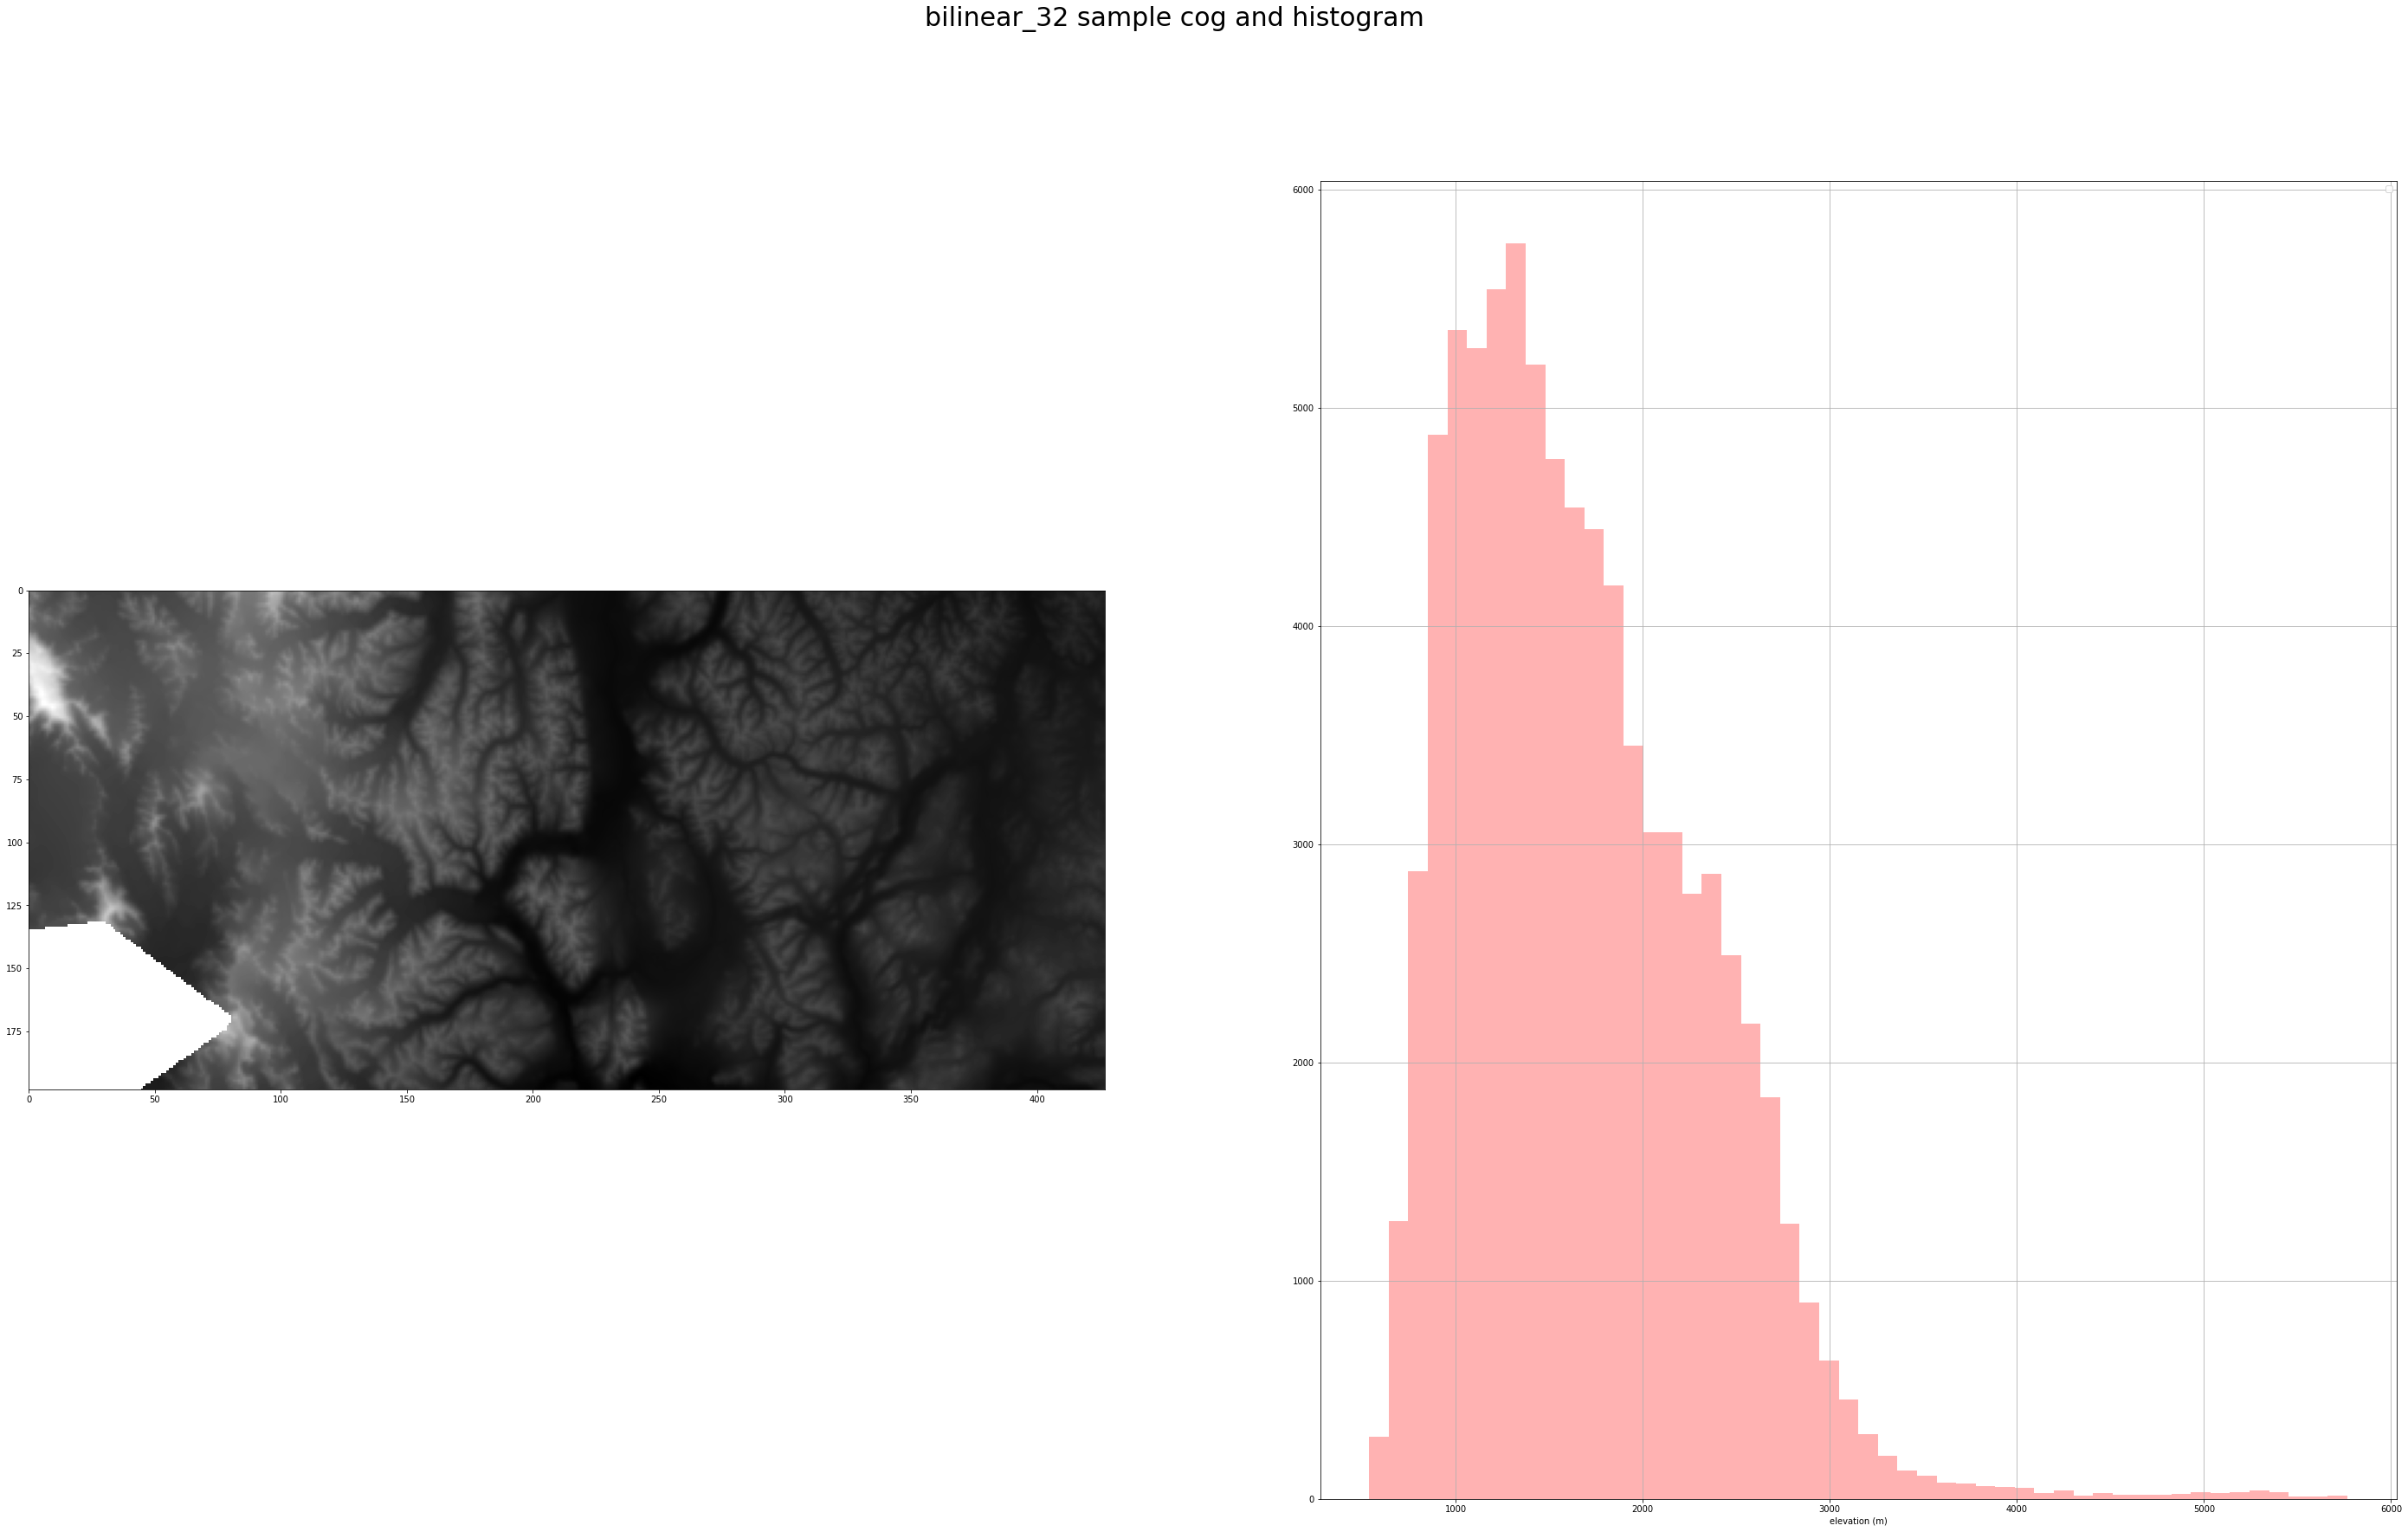

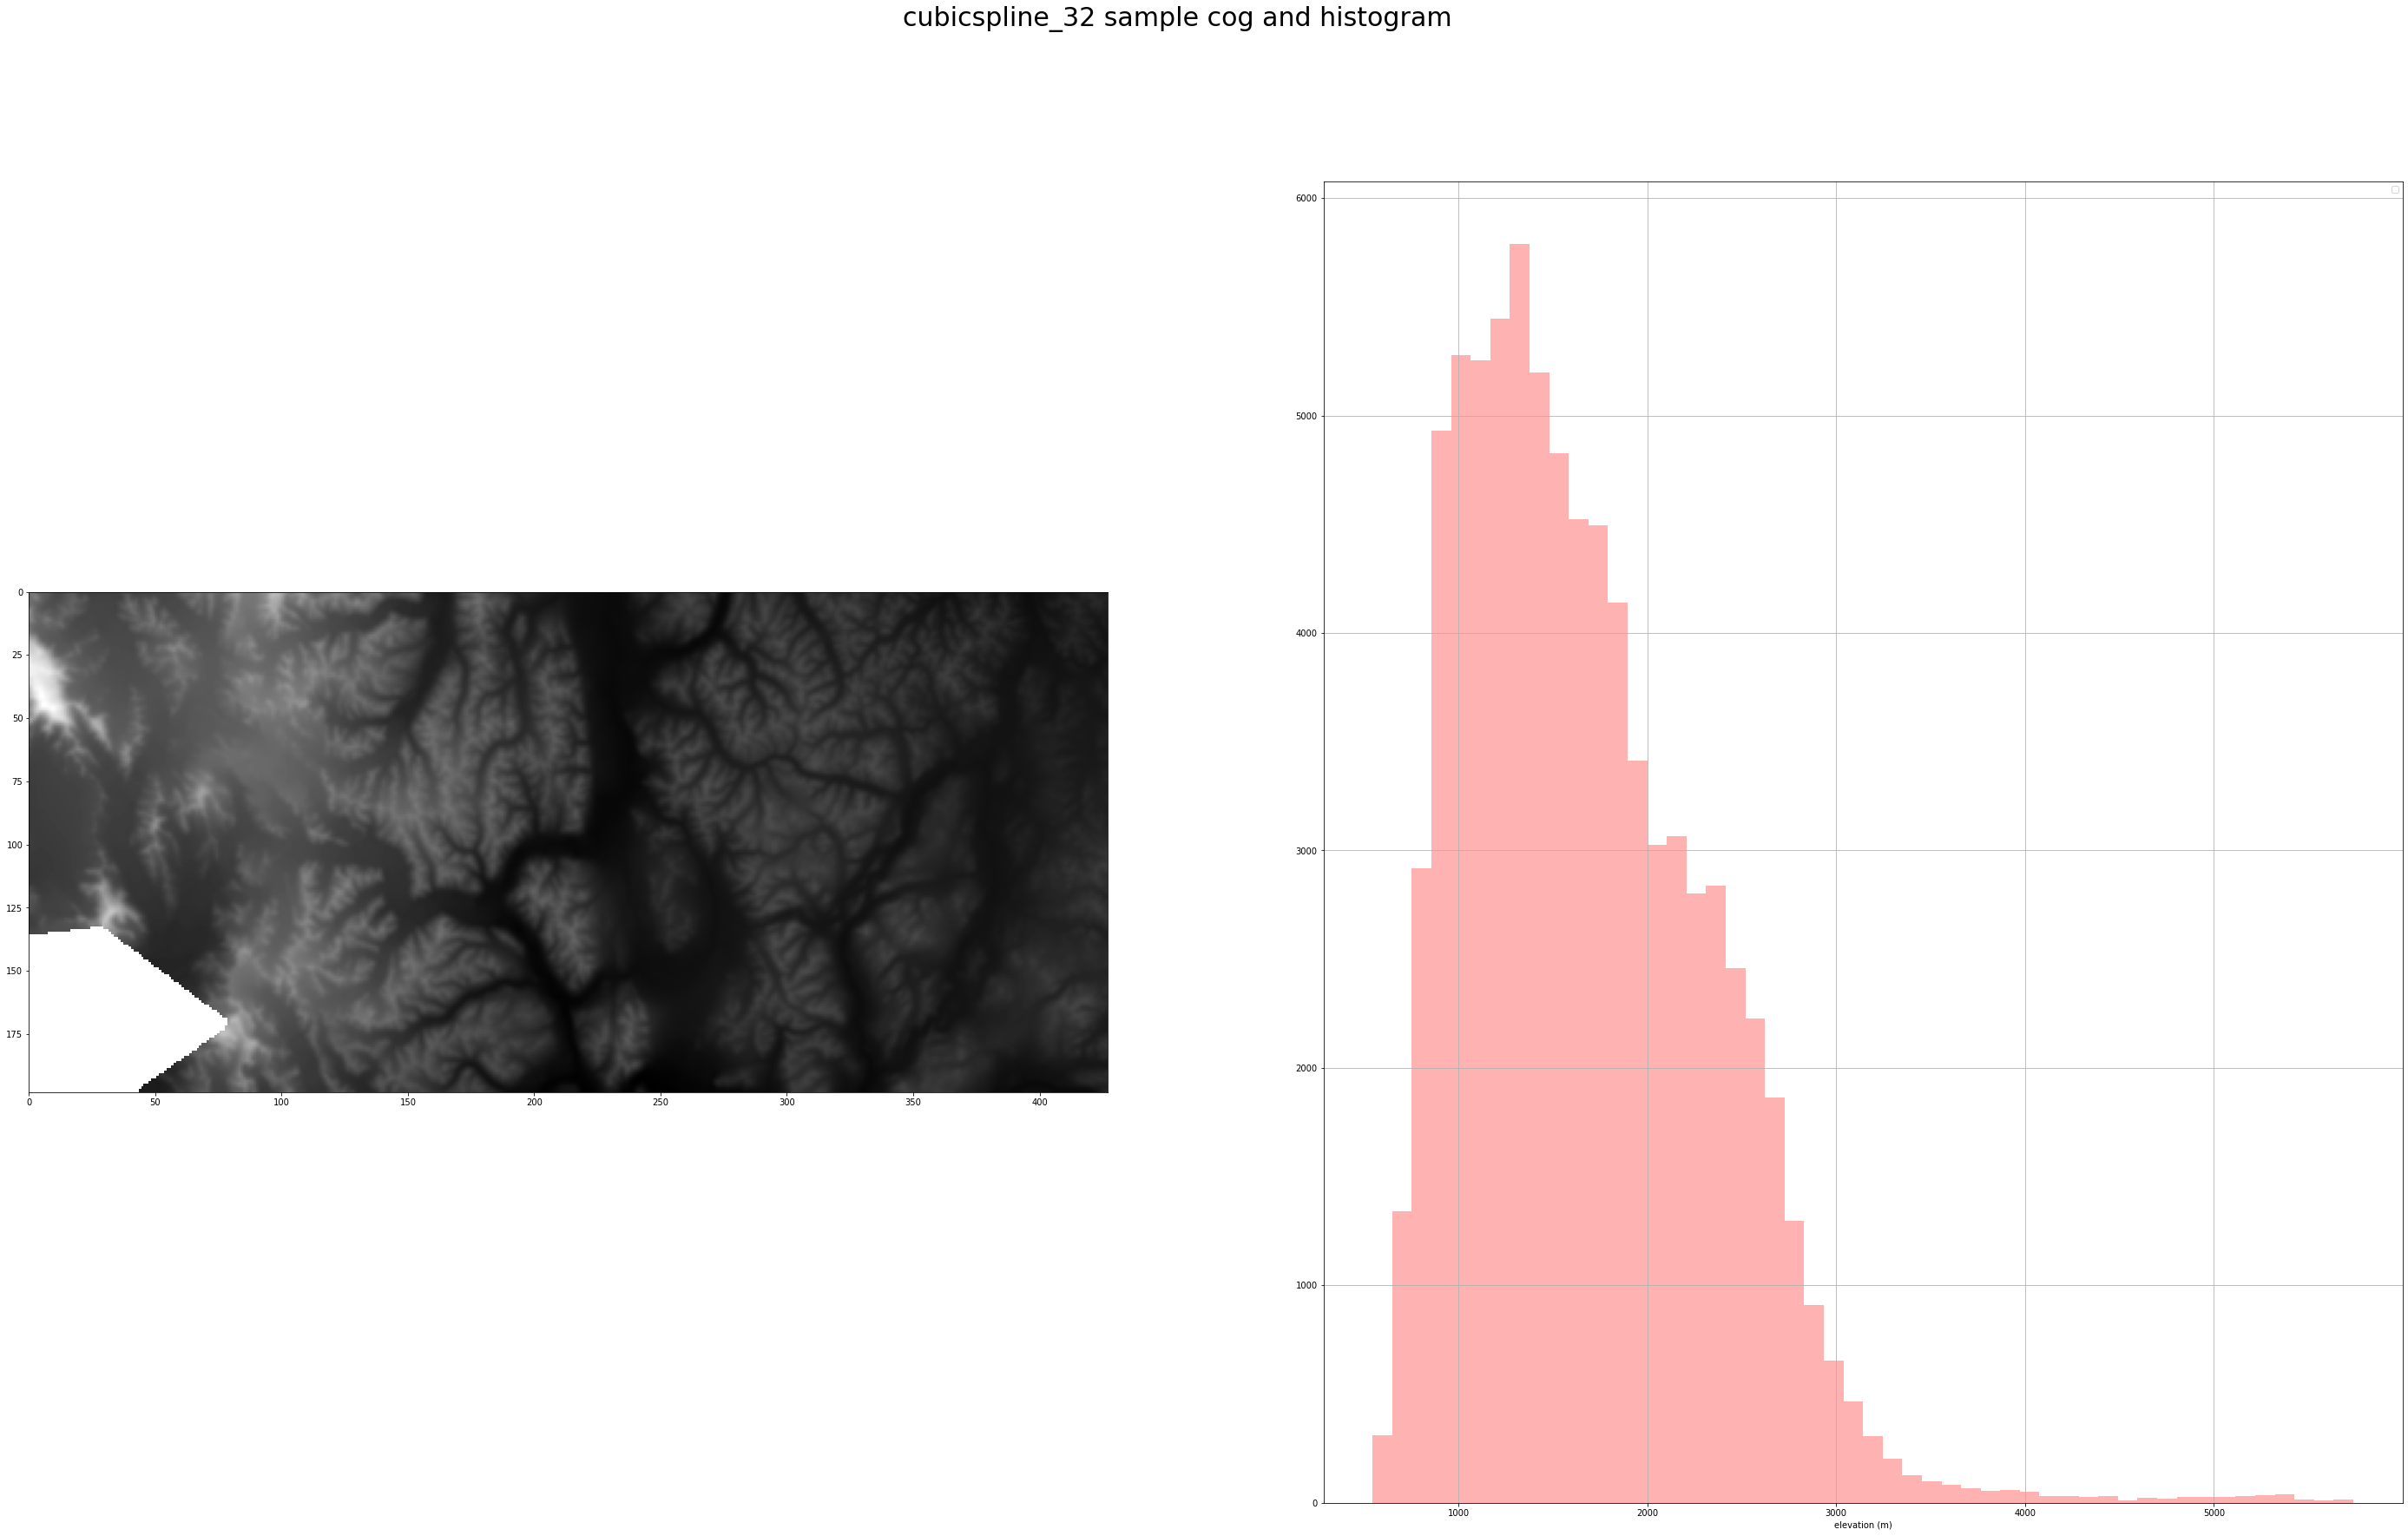

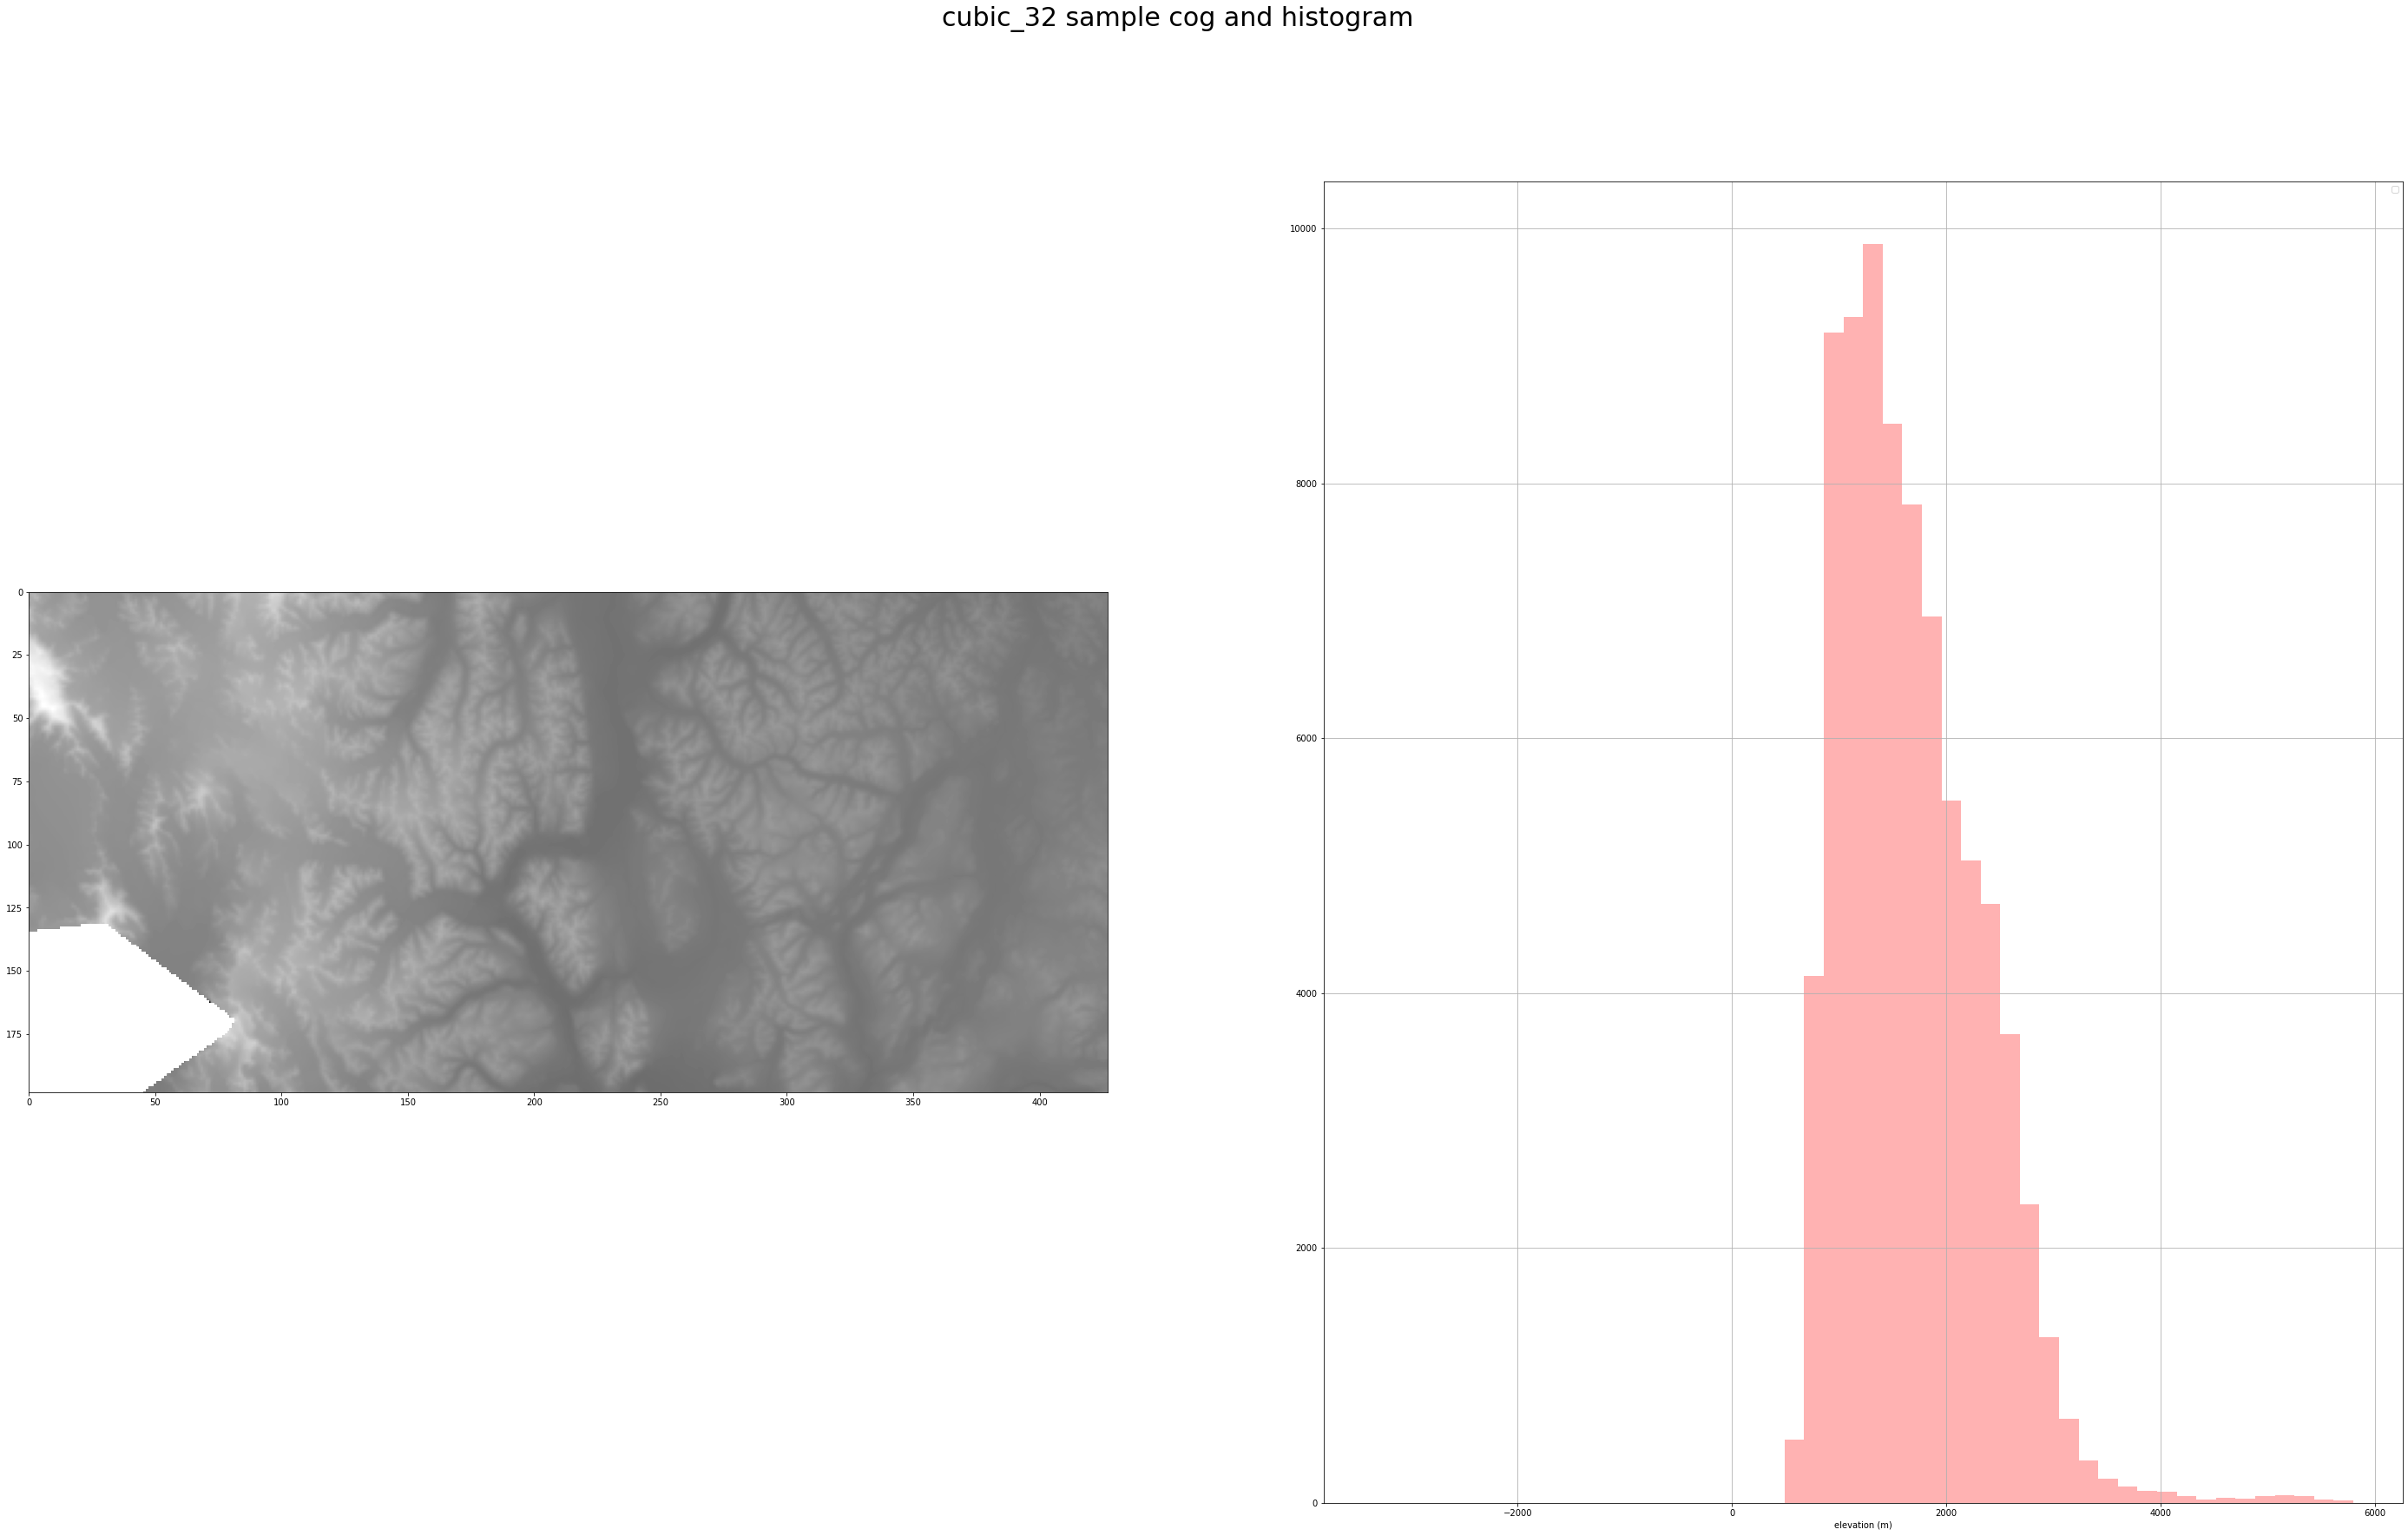

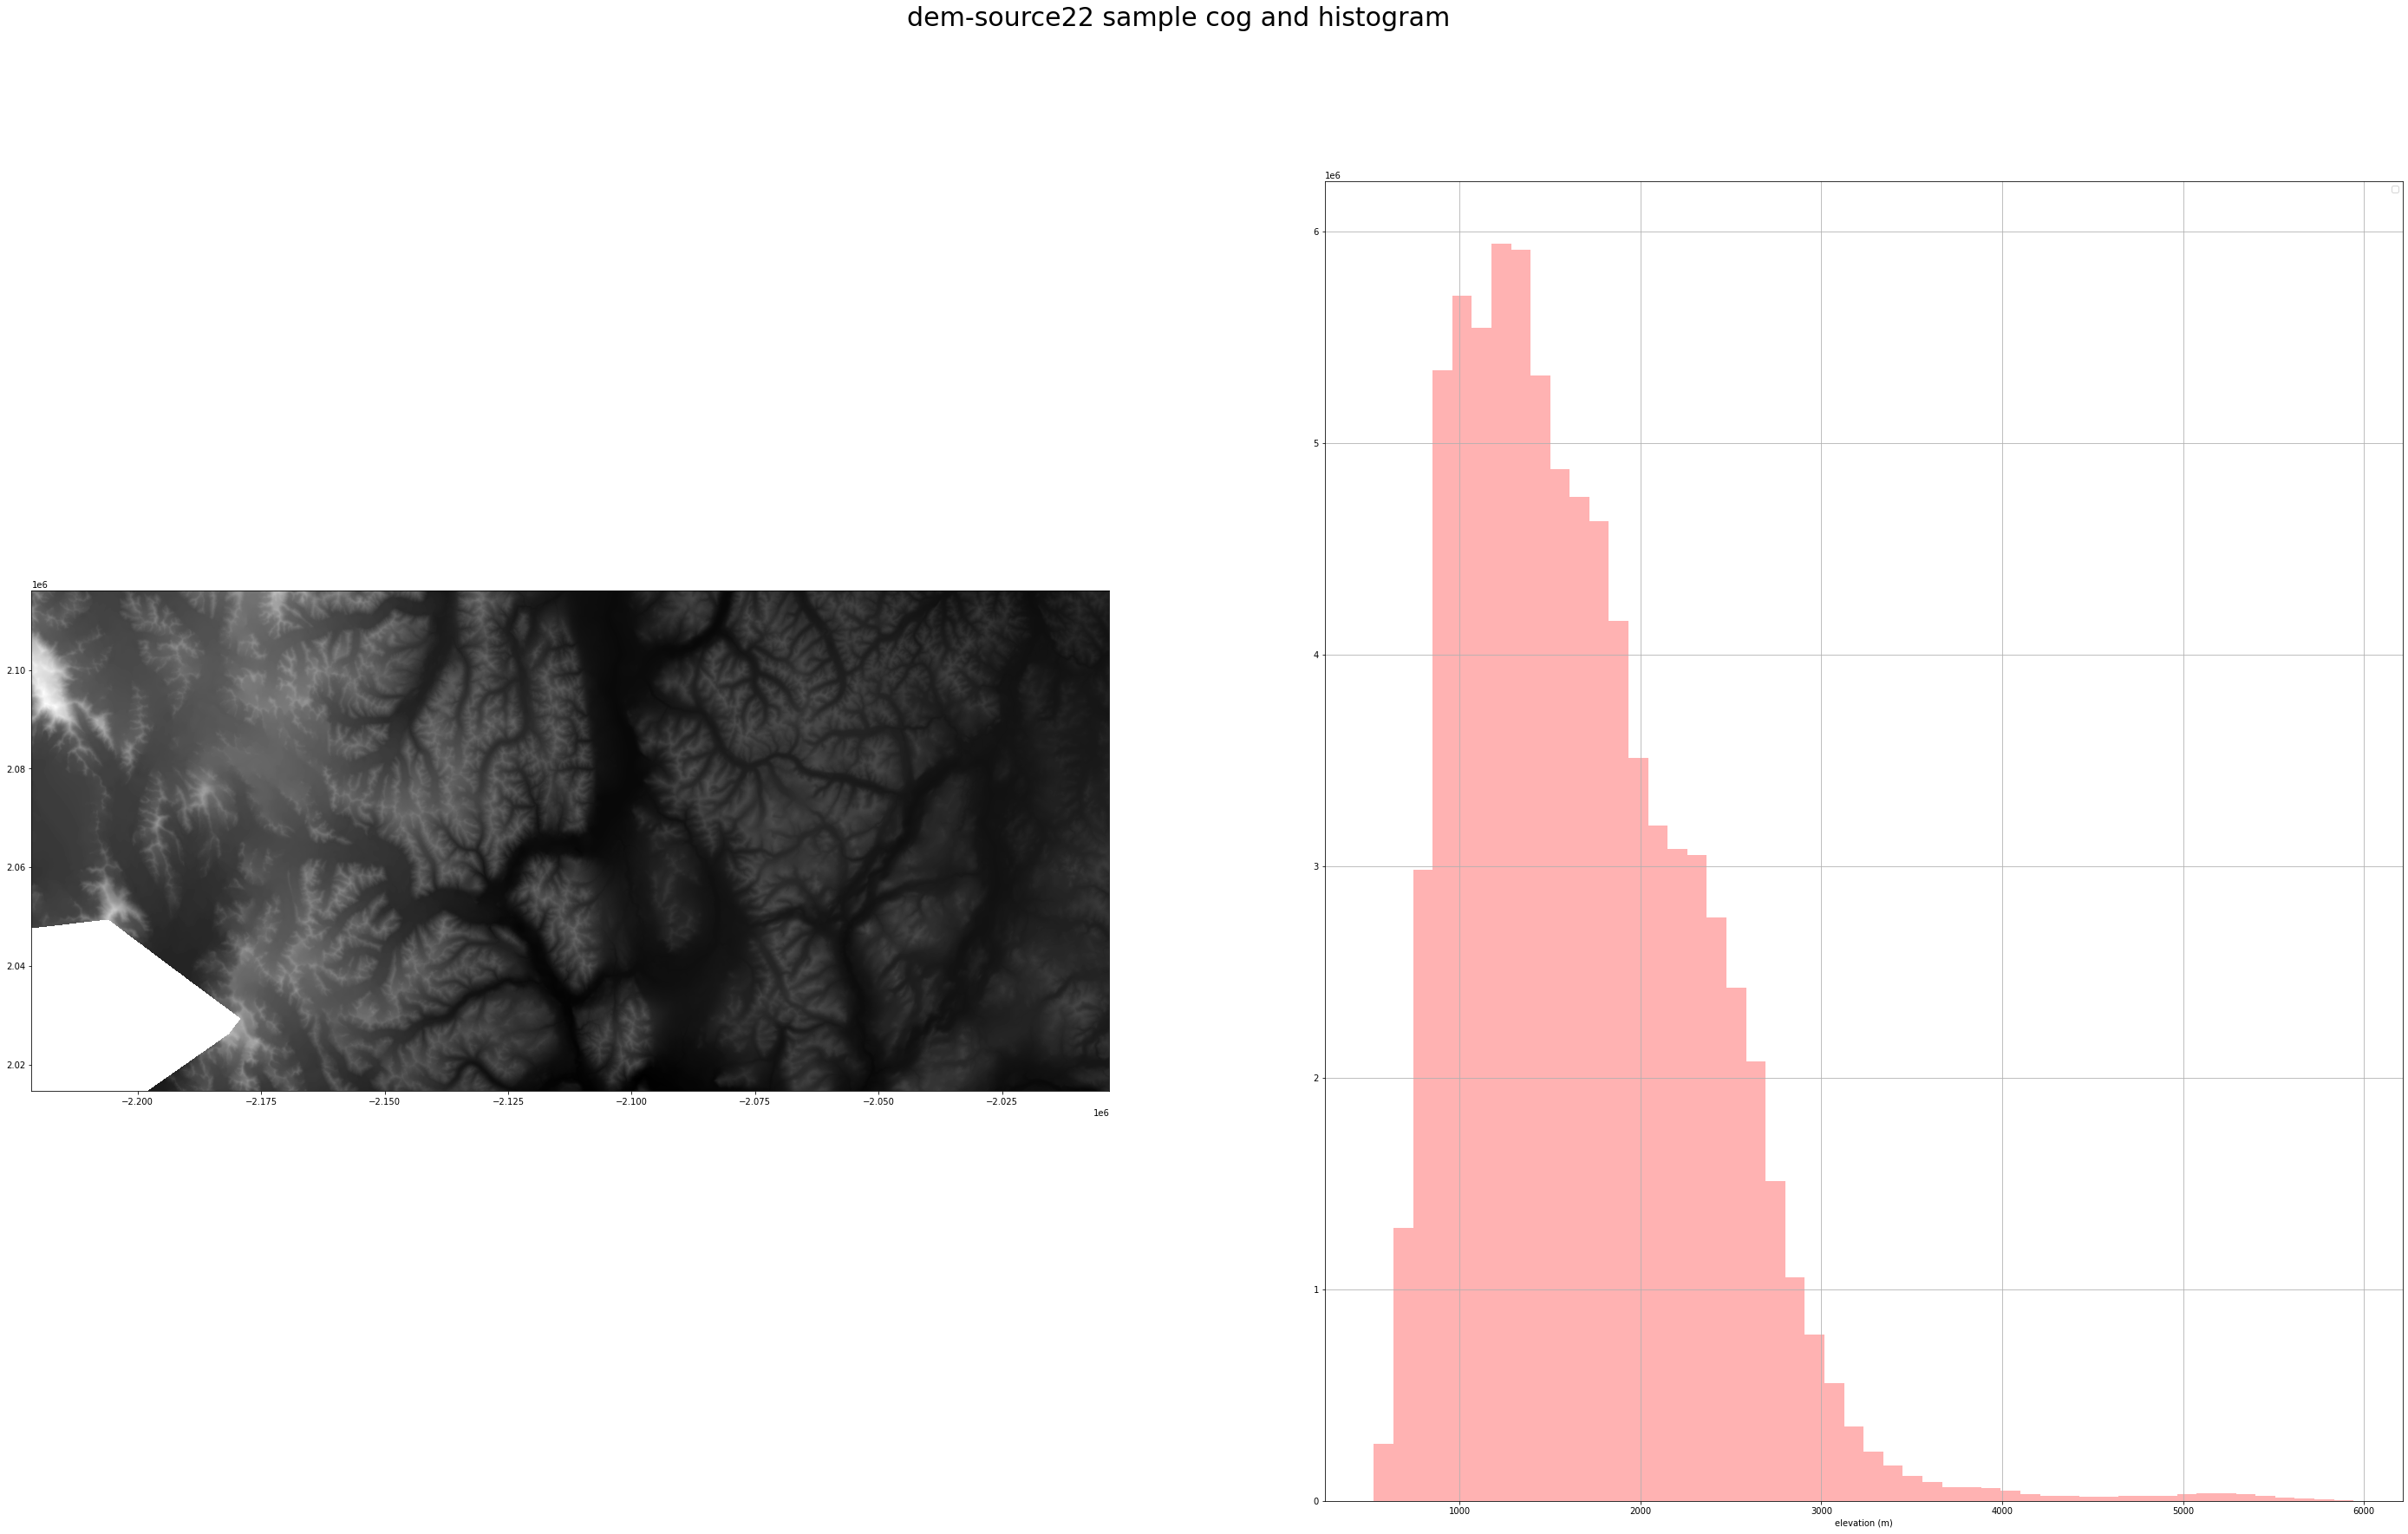

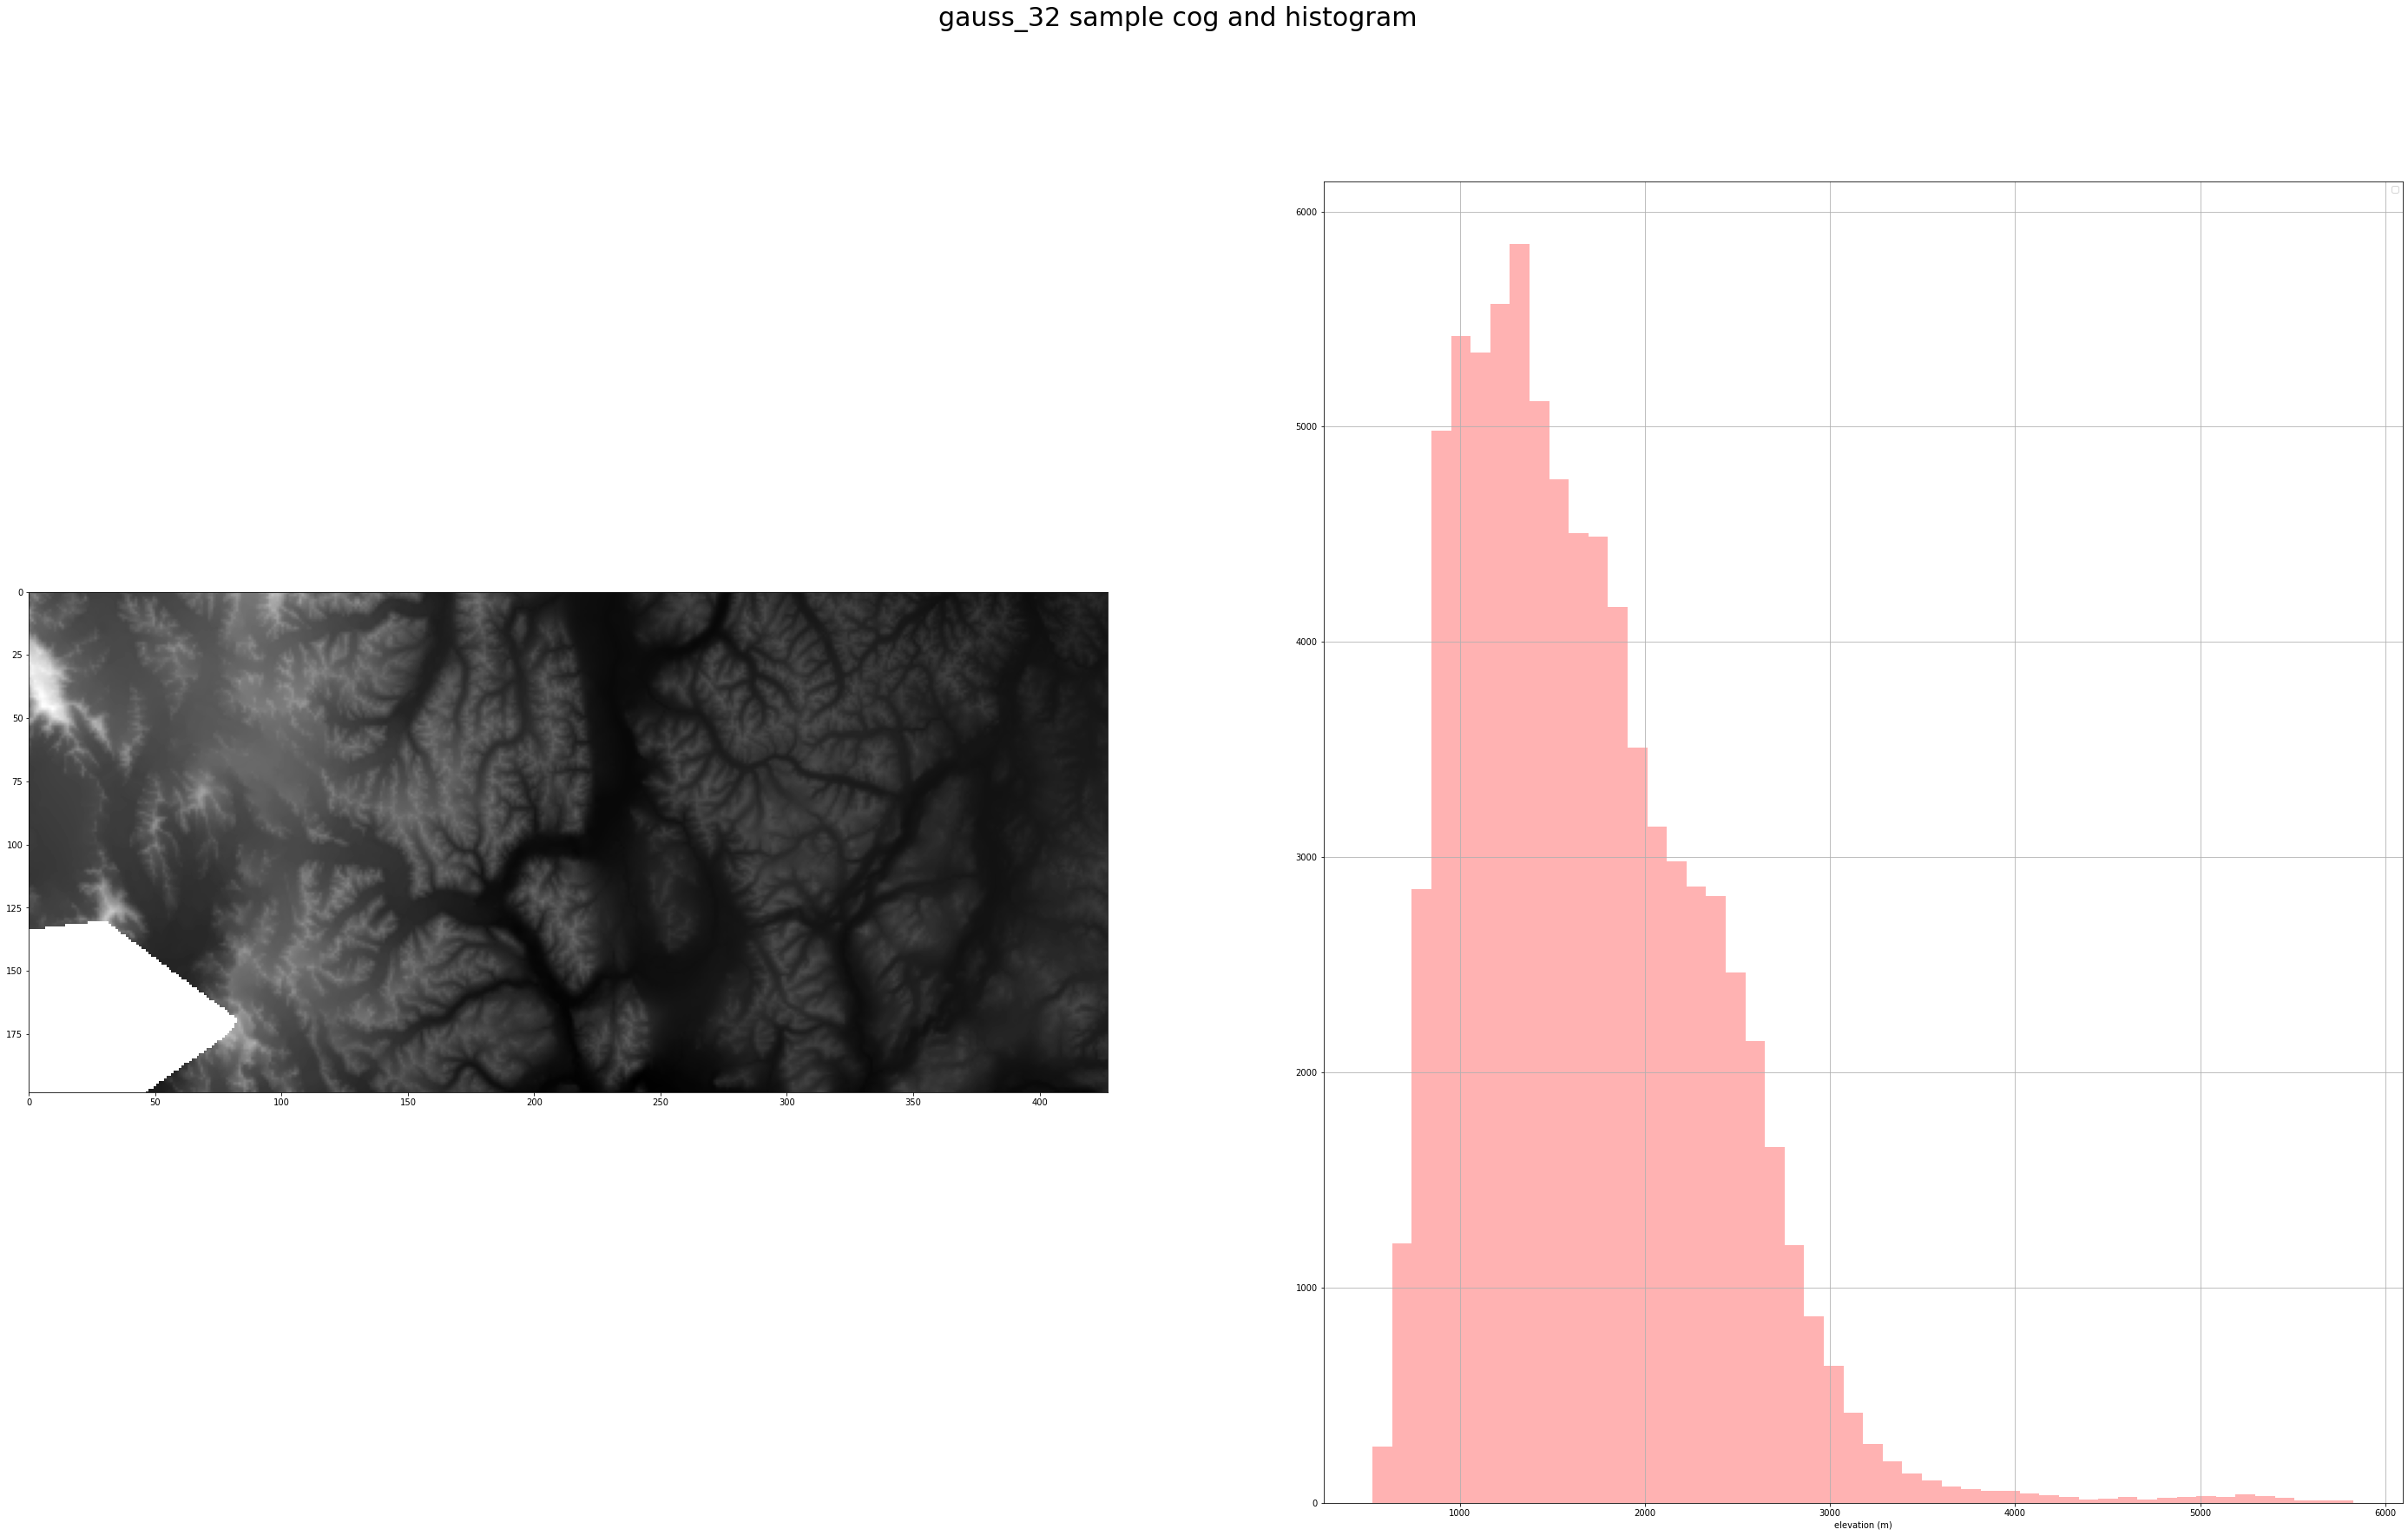

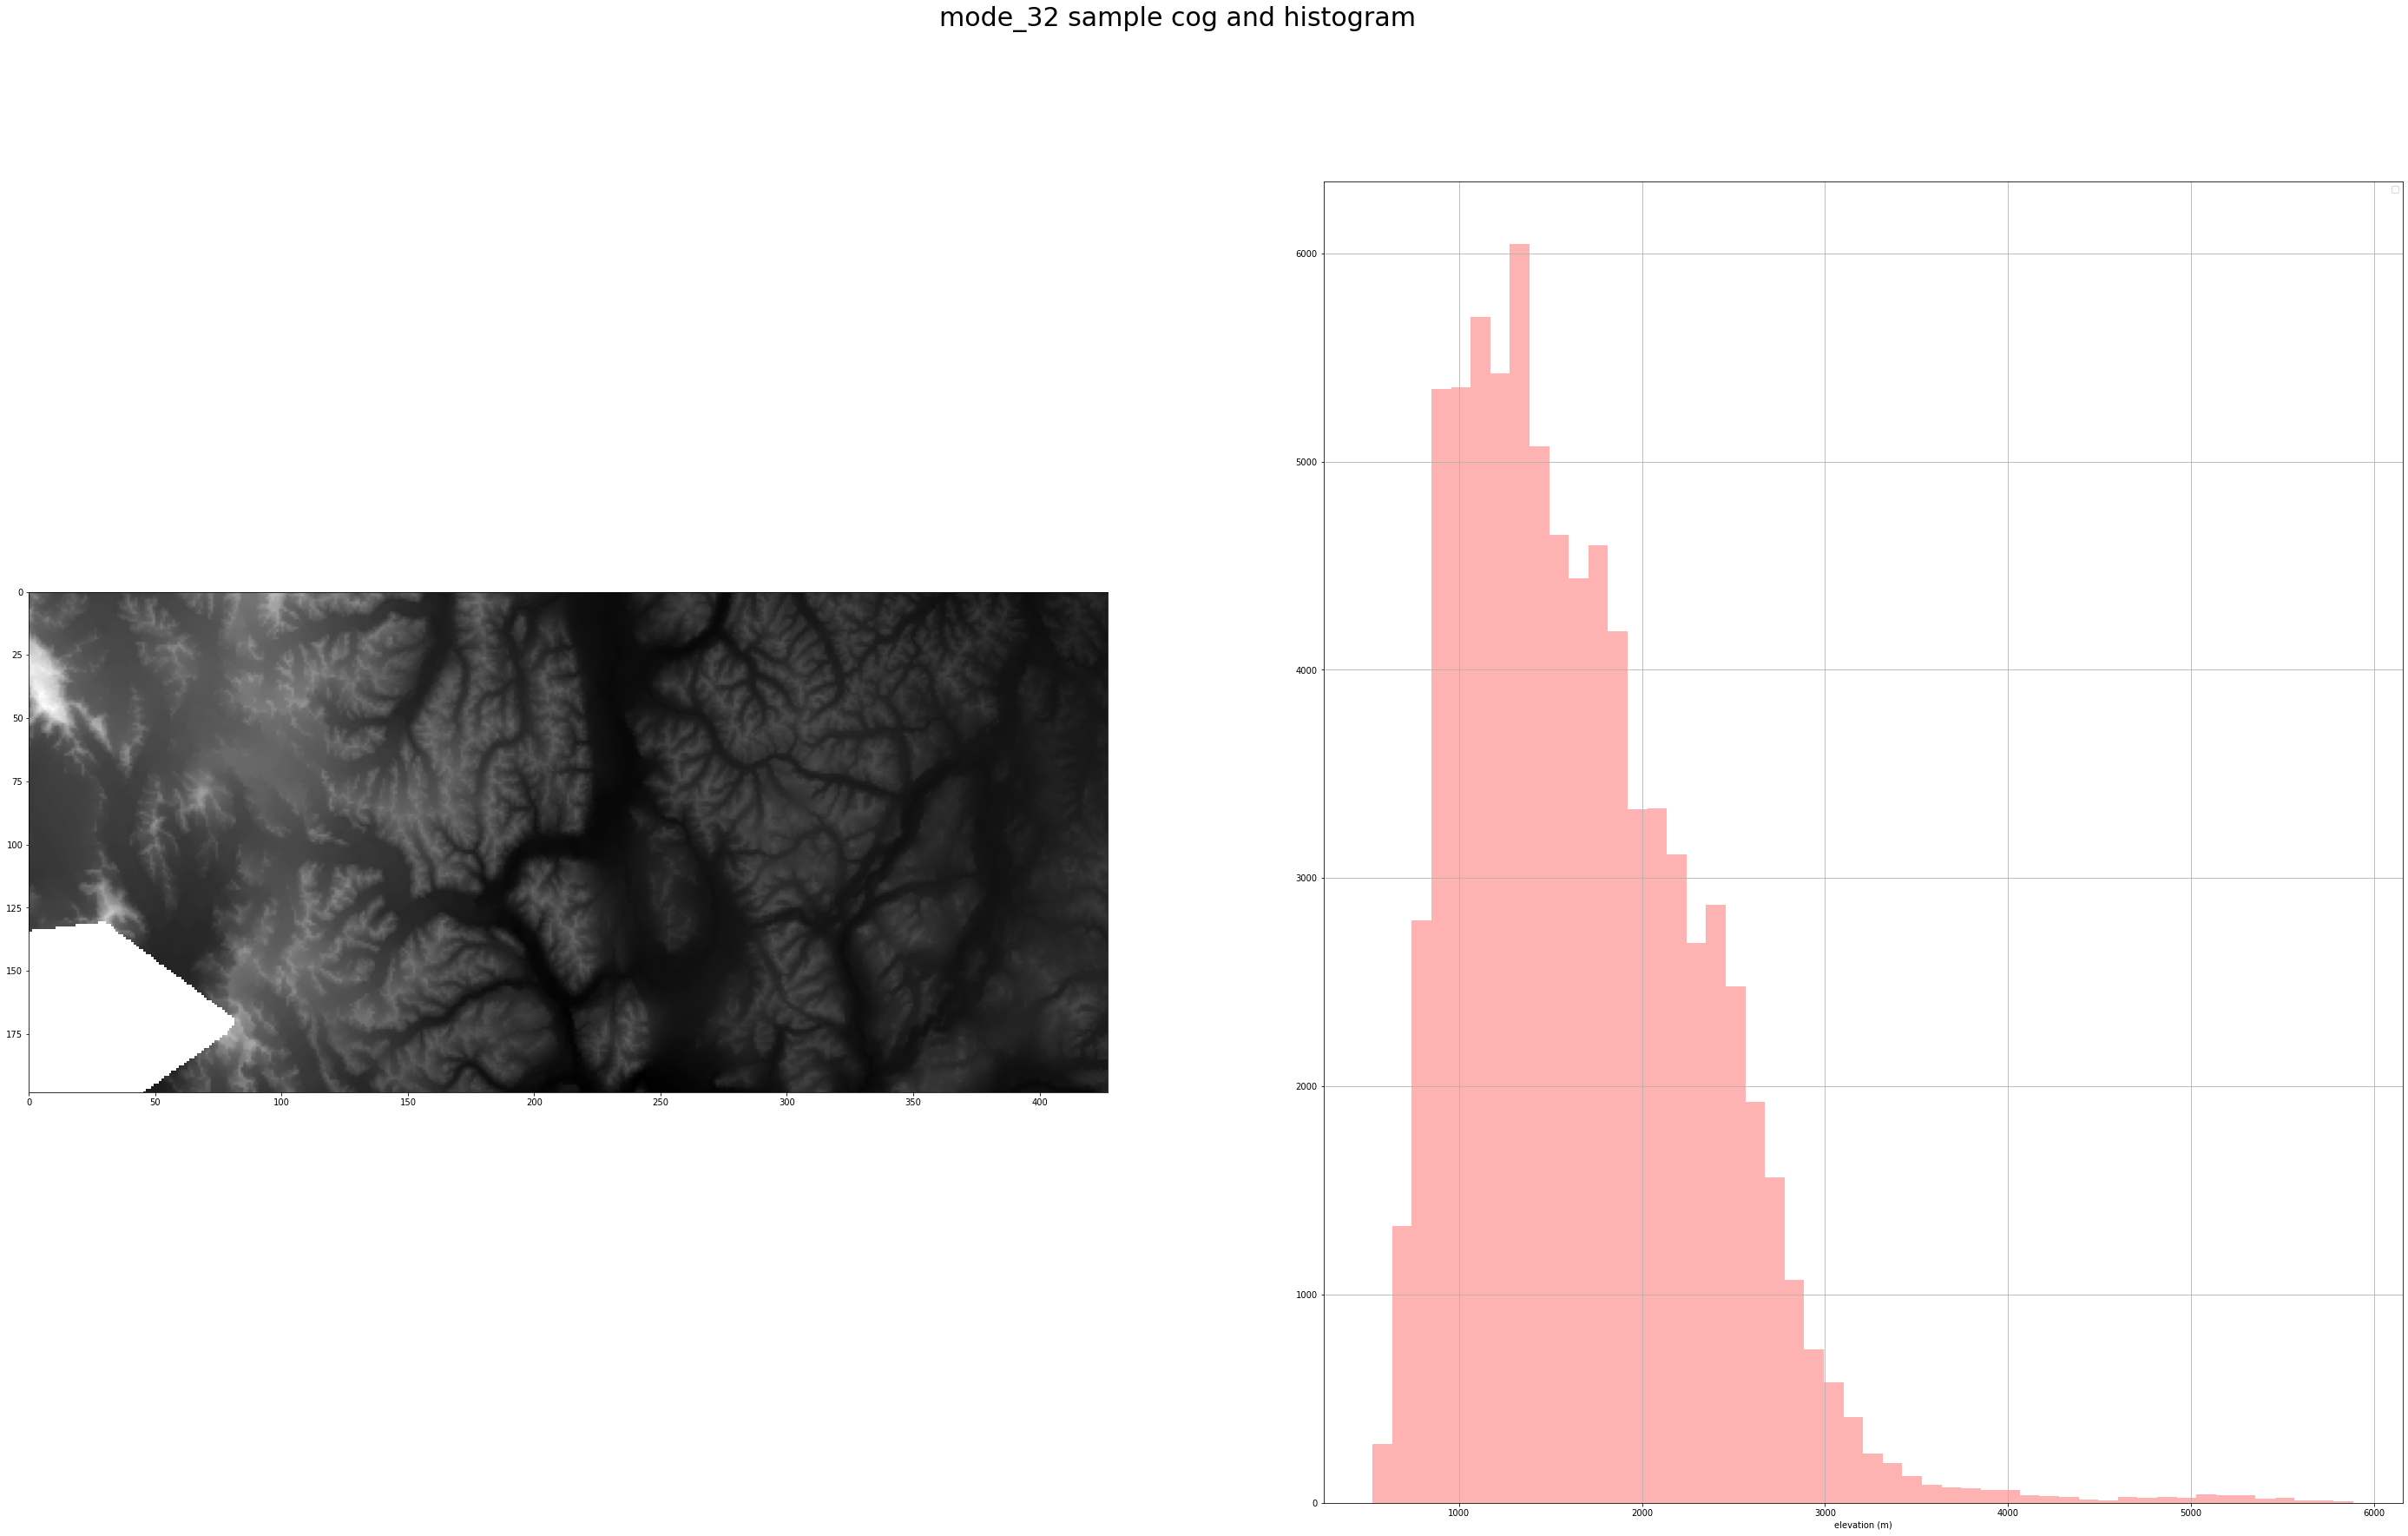

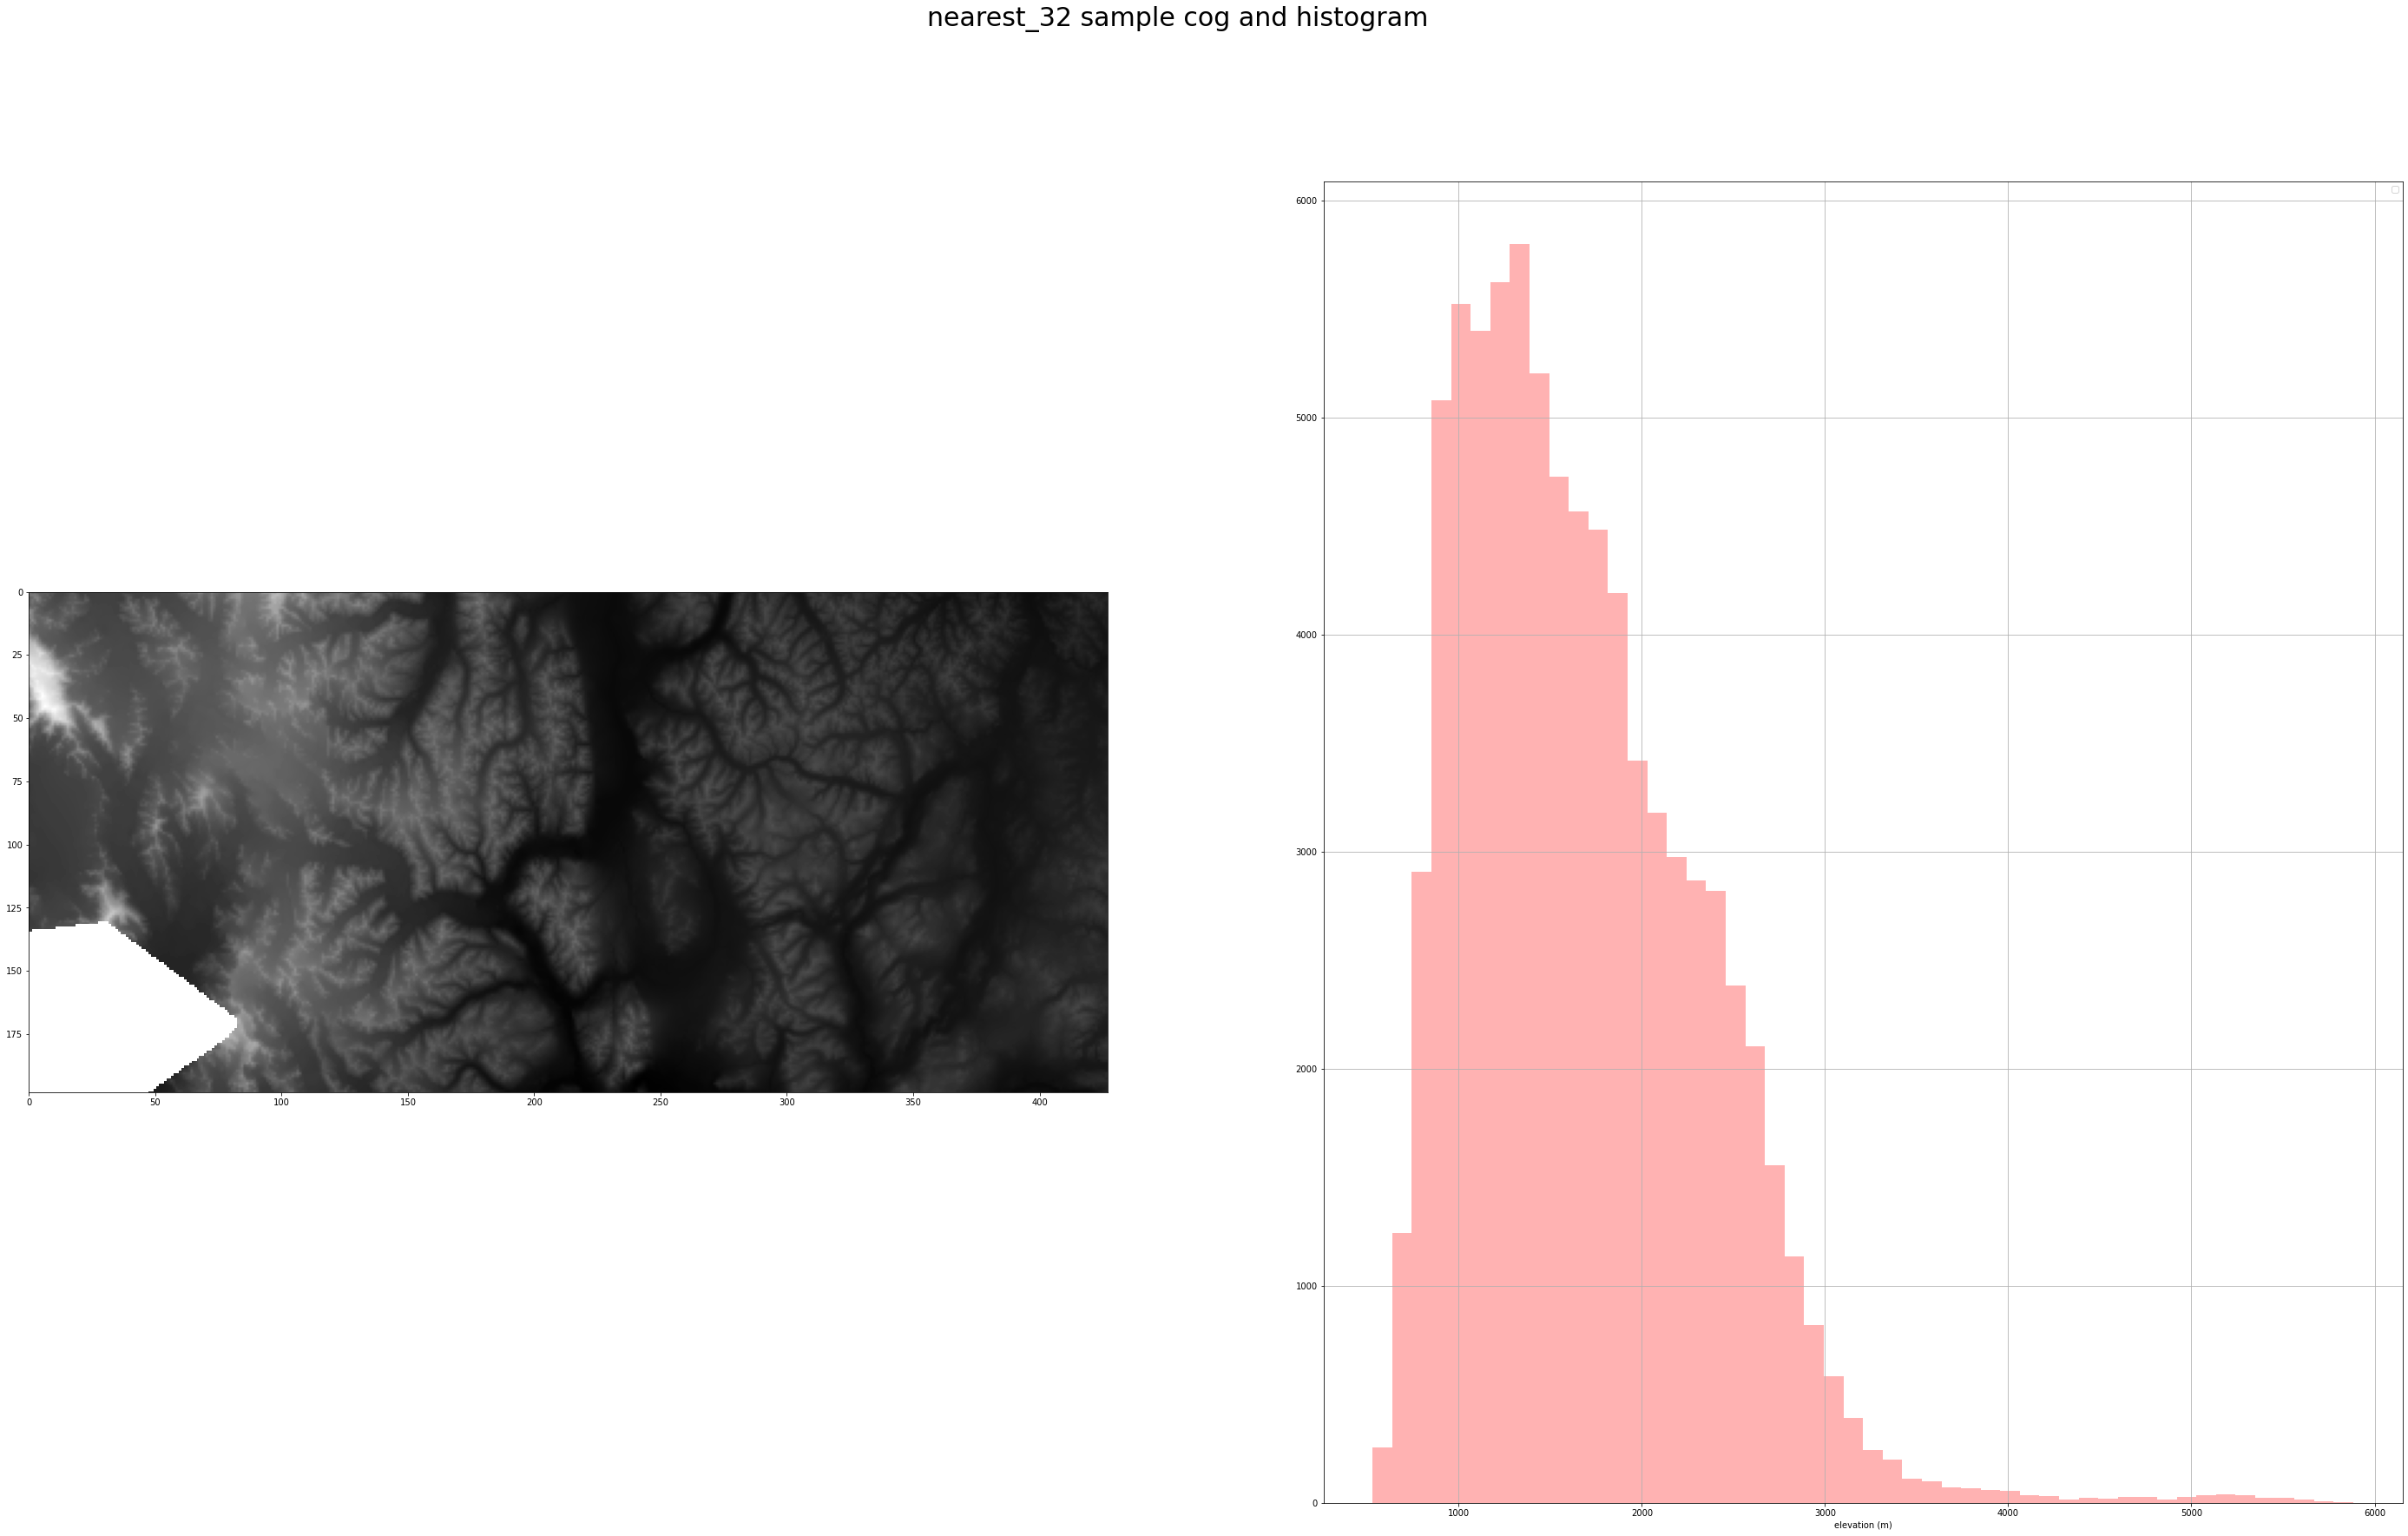

In [3]:
path = 'C://Users//Owner//COOP4//PortableGit//nrcan-datacube//module_03//test'
for filename in glob.glob(os.path.join(path, '*.tif')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
    cog_sample = rasterio.open(filename)
    cur_name = os.path.basename(filename)[:-4]
    
    bound = str(cog_sample.bounds)
    crs = str(cog_sample.crs)
    dtype = str(cog_sample.dtypes[0])
    trans = str(cog_sample.transform)
    nodata = str(cog_sample.nodata)
    shape = str(cog_sample.shape)
    meta = str(cog_sample.meta)
    output = "{}_info".format(cur_name)
    f = open(output+'.txt',"w")
    f.write("stats: " + "\n" + 
            "bound: " + bound + "\n" + 
            "crs: " + crs + "\n" + 
            "dtype: " + dtype + 
            "transform: " + trans + 
            "nodata: " + nodata + 
            "shape: " + shape + 
            "metadata: " + meta)
    
    fig, (aximage, axhist) = pyplot.subplots(1, 2, figsize=(49,28))
    figtitle="{} sample cog and histogram".format(cur_name)
    fig.suptitle(figtitle,fontsize=30)
    #create histogram using rasterio show histogram, pass axes subplot handle to axhist
    bins=50
    show_hist(cog_sample, bins=bins, lw=0.0, 
              stacked=False, alpha=0.3,
              histtype='stepfilled',
              ax=axhist)
    axhist.set_title('')
    axhist.set_xlabel('elevation (m)')
    axhist.set_ylabel('')
    axhist.legend('')
    #create display image passing axes subplot handle to aximage
    show(cog_sample, cmap='gray',transform=cog_sample.transform, ax=aximage)
    #save the figure
    fname='C://Users//Owner//COOP4//PortableGit//nrcan-datacube//module_03//test//'+cur_name+'.png'
    pyplot.savefig(fname,format='png')   